<a href="https://colab.research.google.com/github/AKHIL-882/Data-Science-Internship/blob/main/Data_Science_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using Supervised Machine Learning**

### **Aim** -  To implement Linear Regression on predicting the number of marks will a student gets upon the number of hours studied.

**Description :** This model will help them identity the potential students who have higher probability of getting better marks based on the number of hours studied.

The detests contains record of 5 students with two columns - Hours and Score


**Working Model**: In this model we will see how the Python Scikit-Learn library -Linear Regression of machine learning can be used to implement regression functions.

### **Importing the Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline

For more info on how to load dataset into colab.[(Check this 3 ways to load data into colab.)](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92?gi=3da498ee332b#:~:text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file)


In [2]:
from google.colab import files
uploaded = files.upload()

Saving student_scores - student_scores.csv to student_scores - student_scores (2).csv


In [3]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['student_scores - student_scores.csv']))

**Printing the first 5 rows of the dataset**

In [4]:
dataset.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Printing the last 5 rows of the dataset**

In [5]:
dataset.tail(5)

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


### **1. Exploratory Data Analysis** -  **Checking the types of data and basic summary stats.**




There are two features - Hours and  Scores.The main aim is to construct a model that can predict the score of a student based on the number of hours studied.Features are detailed below.

**Hours** : Number of Hours Studied.
**Scores**: Score of a student based on hours

**1.1 Displaying datatype of each column and also display the non-null row**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**1.2 Display the Summary stats which include count, mean, std, min, max etc**

In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Observation** : We can observe that maximum number of hours a student can spend is 9.2 hours - where a student can score of 95.00

**1.3 Finding the correlation between Experience and Age**

In [8]:
Hours = dataset['Hours']
Scores = dataset['Scores']
correlation = Hours.corr(Scores)
correlation

0.9761906560220887

**1.4 Finding Correlation by Pearson methon**

In [9]:
corr = dataset.corr(method = 'pearson')
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### **2. Visualization**

**2.1 Visualizing Dataset using Pairplot**

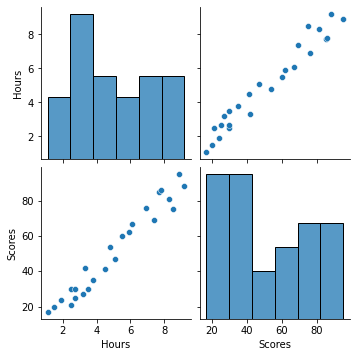

In [10]:
sns.pairplot(dataset)

**Observation :**  We can find that there is a linear relationship between 'Scores' and 'Hours'.

**2.2 Finding Correlation using Heatmap**

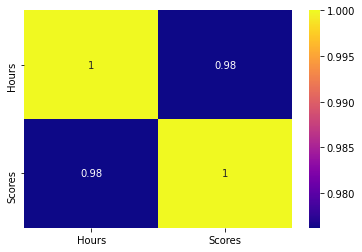

In [11]:
sns.heatmap(dataset.corr(),annot=True,cmap='plasma')

**Observation:** We can find that both Scores and Hours have a correlation of 0.98

**2.3 Plotting the distribution of scores**

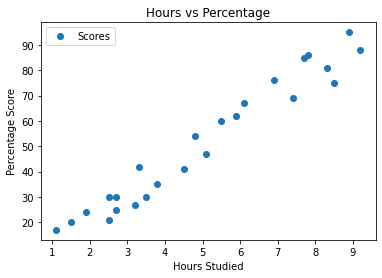

In [12]:
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Observation** :We can find that there is a linear relation between the Hours and Score

### **3. Building the Machine Learning Model - Linear Regression**

**Linear Regression** is a supervised machine learning algorithm where the predicted output is continuous and has a constant slope. It's used to predict values within a continuous range, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types: Simple regression.

**Working of Linear Regression**

Equation of linear regression **->**
   $y = c + m_1x_1$



> $y$ is the response

> $c$ is the intercept

> $m_1$ is the coefficient for the first feature


In this model: 

> $Scores = c + m_1 \times Hours$

The $m$ values are called the model coefficients or model parameters.

**3.1 Collecting dataset into x and y variables**

In [13]:
x = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values

**3.2 Importing the StandardScaler and Train_test_split**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scx = StandardScaler()
scy = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)
scx.fit_transform(X_train)
scx.transform(X_test)

array([[-1.56870446],
       [-0.8797142 ],
       [ 0.82249702],
       [-1.16341607],
       [ 0.21456444],
       [-0.63654117],
       [-1.40658911],
       [ 0.98461237]])

**Observation** : Here we are standardizing the data and splited the data in the ratio 70:30 for training and testing

**3.3 Importing Linear Regression from Linear Model**

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

**3.4 Fitting the data into the model**

In [18]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**3.5 Finding Intercept and Coefficient**

In [19]:
print(model.intercept_)
print(model.coef_)

2.3708153823418883
[9.78856669]


**Observation** :  
So our Linear Regression Model equation is:

**$ Scores = 2.3708 + 9.788* Hours $**

**3.6 Visualizing the Linear Regressor on Train Data**

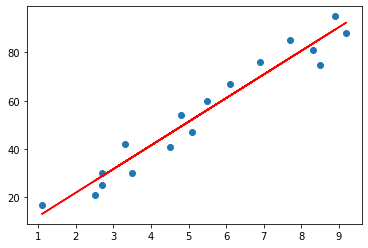

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train,model.intercept_ + model.coef_ * X_train,'r')
plt.show()

**Observation**: The linear regressor line is correctly fitted on to the graph

**3.5  Calculating the Prediction**

In [21]:
y_pred = model.predict(X_test)

In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


**3.6 Visualizing the Linear Regressor on Test Data**

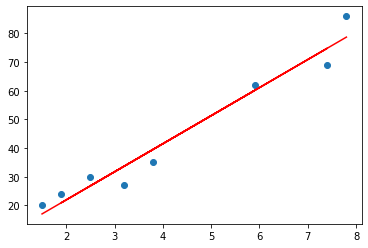

In [23]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.intercept_ + model.coef_ * X_test, 'r')
plt.show()

**Observation**: The linear regressor line is fitted well for Testing data

### **4. Model Evaluation**

**4.1 Importing required libraries for model evaluation**

In [24]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

**4.2 Printing All the metrics**

In [25]:
print("Mean Absolute Error :",metrics.mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error : ', np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score:",metrics.r2_score(y_test,y_pred) *100)
r_squared = r2_score(y_test, y_pred)
print('R-Squared : ',r_squared *100)

Mean Absolute Error : 4.419727808027651
Root Mean Squared Error :  4.7921912746363144
R2 score: 95.68211104435257
R-Squared :  95.68211104435257


### **5. Testing The model for User Input**

In [26]:
hours = float(input())
own_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

9.25
No of Hours = 9.25
Predicted Score = 92.91505723477056


**Conclusion** : If a student studies for 9.25 hours in a day , then predicted score (in percentage) would be 92.9 % .